In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Useful packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import seed

seed(0)

In [3]:
# Data loading

train_titanic=pd.read_csv("train.csv")

test_titanic=pd.read_csv("test.csv")

In [4]:
train_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data description

We have eleven variables:

    - PassengerId: Primary key that are unique for each passenger
    - Survived: feature that gives information about the status of a passenger after accident,
    (0/1)-(Died/Survived)
    - Pclass: The class that the passager was embarked
    - Name: Name of the passenger
    - Sex: gender of the passenger
    - Age : Age of passenger
    - SibSp: Number of siblings/spouse on board of titanic
    - Parch: Number of parent/children on board of titanic
    - Ticket: Ticket number
    - Fare: Price of passenger's ticket 
    - Cabin: Cabin number
    - Embarked: Port of embarkation

In [7]:
train_titanic=pd.read_csv("train_processed.csv")
test_titanic=pd.read_csv("test_processed.csv")

### Encodage des variables

In [8]:
#Train data

train_titanic['Pclass']=train_titanic['Pclass'].astype('category')

# Test data

test_titanic['Pclass']=test_titanic['Pclass'].astype('category')

In [9]:

train_titanic['Cabin_new']=train_titanic['Cabin_new'].apply(lambda x:str(x).strip()[0])

test_titanic['Cabin_new']=test_titanic['Cabin_new'].apply(lambda x:str(x).strip()[0])

In [10]:
train_titanic[train_titanic["Fare"]==35]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
23,1,1,male,28.0,0,0,35,S,A
55,1,1,male,65.0,0,0,35,S,C
339,0,1,male,45.0,0,0,35,S,T
351,0,1,male,23.0,0,0,35,S,C
647,1,1,male,56.0,0,0,35,C,A


In [11]:
# As there are no cabin with T in test set then to keep the same format in test and train set
# We will replace T by C that is more similar to this view based on other attributes

train_titanic['Cabin_new']=train_titanic['Cabin_new'].replace('T','C') 

In [12]:
train_titanic_numeric=pd.get_dummies(train_titanic)

test_titanic_numeric=pd.get_dummies(test_titanic)

train_titanic_numeric.shape,test_titanic_numeric.shape

((891, 20), (418, 19))

In [13]:
train_titanic_numeric.to_csv('train_ready_modelisation.csv',index=False)
test_titanic_numeric.to_csv('test_ready_modelisation.csv',index=False)

### Modelisation

In [95]:
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [96]:
lr_model=LogisticRegression(penalty="l2",class_weight="balanced")
LDA=LinearDiscriminantAnalysis()
LR=KNeighborsClassifier(n_neighbors=2,n_jobs=-1)

In [97]:
y=train_titanic_numeric["Survived"]
X=train_titanic_numeric.drop(columns=["Survived"])

In [98]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=.1)

In [99]:
import numpy as np

## Logistic Regression optimisation
grid_lr={"C":np.logspace(-3,3,10), "penalty":["l1","l2","elasticnet"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=10000)
grid_LR=GridSearchCV(logreg,grid_lr,cv=5,scoring="accuracy",n_jobs=-1)

## LR optimisation
LR = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_KNN = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

## LDA optimisation

lda_grid=dict()
lda_grid['solver']=['svd', 'lsqr', 'eigen']

grid_LDA=GridSearchCV(LDA, lda_grid, scoring='accuracy', cv=5, n_jobs=-1 )

In [100]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

models={"LR":grid_LR,"KNN":grid_KNN,"LDA":grid_LDA}


def sample_impact(models,X,y):


    check_mean={"accuracy_mean":[],"precision_mean":[],"recall_mean":[],"f1_score_mean":[]}
    check_std={"accuracy_std":[],"precision_std":[],"recall_std":[],"f1_score_std":[]}
    
    for name,model in zip(models.keys(),models.values()):
        
        
        #for test_size in n_attributes_in_range:
            #test_scores[name]=check

        score_accuracy=cross_val_score(model,X,y,cv=10,scoring='accuracy')
        score_precision=cross_val_score(model,X,y,cv=10,scoring='precision')
        score_recall=cross_val_score(model,X,y,cv=10,scoring='recall')
        score_f1=cross_val_score(model,X,y,cv=10,scoring='f1')
        
        #Testing score
        #Accuracy
        check_mean["accuracy_mean"].append(np.mean(score_accuracy))
        check_std["accuracy_std"].append(np.std(score_accuracy))

        #Presicion
        check_mean["precision_mean"].append(np.mean(score_precision))
        check_std["precision_std"].append(np.std(score_precision))


        #Recall
        check_mean["recall_mean"].append(np.mean(score_recall))
        check_std["recall_std"].append(np.std(score_recall))

        #F1-Score
        check_mean["f1_score_mean"].append(np.mean(score_f1))
        check_std["f1_score_std"].append(np.std(score_f1))
            
    return check_mean,check_std

In [101]:
scores_means,scores_stds=sample_impact(models,X,y)

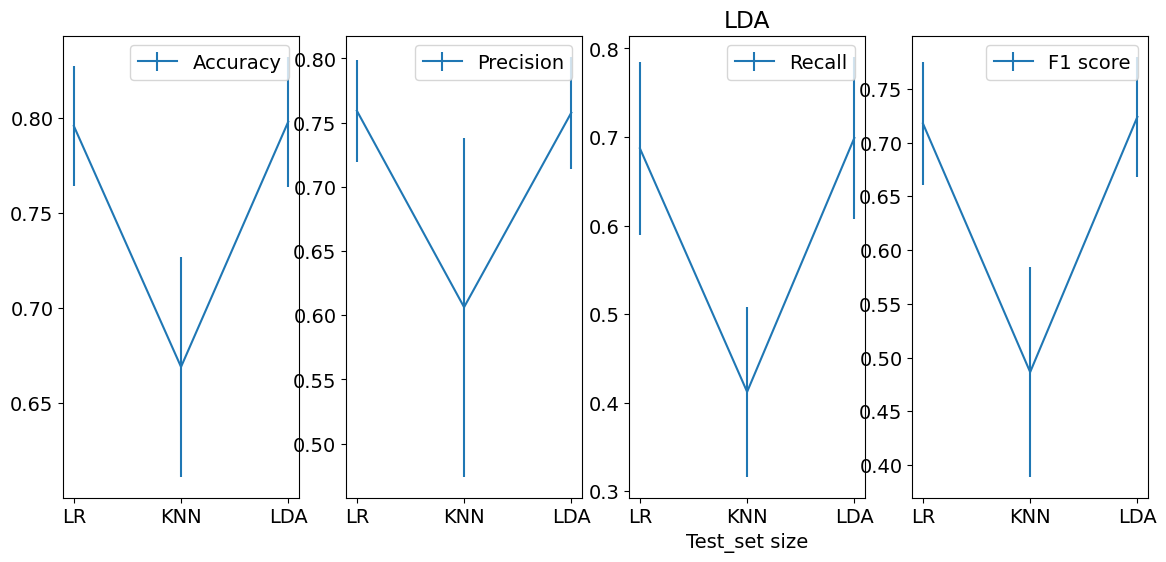

In [102]:
plt.rcParams.update({'font.size':14})
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(14,6))


axes[0].errorbar(models.keys(),scores_means["accuracy_mean"],scores_stds["accuracy_std"],label="Accuracy")
axes[1].errorbar(models.keys(),scores_means["precision_mean"],scores_stds["precision_std"],label="Precision")
axes[2].errorbar(models.keys(),scores_means["recall_mean"],scores_stds["recall_std"],label="Recall")
axes[3].errorbar(models.keys(),scores_means["f1_score_mean"],scores_stds["f1_score_std"],label="F1 score")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[2].set_xlabel("Test_set size")
axes[2].set_title("LDA")

plt.show()


### Automation & Feature sampling assess

In [103]:
from sklearn.feature_selection import SelectKBest,RFE,f_classif

selector=SelectKBest(score_func=f_classif)

# Entrainnement de la méthode
selector_fitted=selector.fit(X_train,y_train)

print("Significant variables in modeling passenger survival: ",X_train.columns[selector_fitted.get_support()])

Significant variables in modeling passenger survival:  Index(['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_S', 'Cabin_new_C', 'Cabin_new_F'],
      dtype='object')


In [104]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

models={"LR":grid_LR,"KNN":grid_KNN,"LDA":grid_LDA}

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

models={"LR":grid_LR,"KNN":grid_KNN,"LDA":grid_LDA}

def attribute_impact(models,X,y,n_attributes_in_range):

        """
        Parameter:
        X: Données d'entrainnement contenant des variables independantes
        y: les labels des variables indépendantes pour les données d'entrainnement
        n_attributes_in_range: Le range du nombre de variable à extraire de l'ensemble des variables indépendantes
        threshold: La proportion de l'information à selectionner afin de supprimer des données abérantes

        Return:
        
        """
    
        scores_means={}
        scores_stds={}
        
        
        for name,model in zip(models.keys(),models.values()):
            
            #train_scores,test_scores=initiate_dict(models)

            #train_scores[name]=[]
            
            check_mean={"accuracy_mean":[],"precision_mean":[],"recall_mean":[],"f1_score_mean":[]}
            check_std={"accuracy_std":[],"precision_std":[],"recall_std":[],"f1_score_std":[]}
            
            for num_attributes in n_attributes_in_range:

                #Intialisation de la méthode de selection

                selector=SelectKBest(score_func=f_classif, k=num_attributes)

                # Entrainnement de la méthode
                selector_fitted=selector.fit(X,y)

                # Récuperation des variables sélectionnées
                columns=X.columns[selector.get_support()]

                #test_scores[name]=check

                score_accuracy=cross_val_score(model,X[columns],y,cv=5,scoring='accuracy',n_jobs=-1)
                score_precision=cross_val_score(model,X[columns],y,cv=5,scoring='precision',n_jobs=-1)
                score_recall=cross_val_score(model,X[columns],y,cv=5,scoring='recall',n_jobs=-1)
                score_f1=cross_val_score(model,X[columns],y,cv=5,scoring='f1',n_jobs=-1)
                
                #Testing score
                #Accuracy
                check_mean["accuracy_mean"].append(np.mean(score_accuracy))
                check_std["accuracy_std"].append(np.std(score_accuracy))

                #Presicion
                check_mean["precision_mean"].append(np.mean(score_precision))
                check_std["precision_std"].append(np.std(score_precision))


                #Recall
                check_mean["recall_mean"].append(np.mean(score_recall))
                check_std["recall_std"].append(np.std(score_recall))

                #F1-Score
                check_mean["f1_score_mean"].append(np.mean(score_f1))
                check_std["f1_score_std"].append(np.std(score_f1))

            scores_means[name]=check_mean
            scores_stds[name]=check_std
                
        return scores_means,scores_stds

In [105]:
n_attributes_in_range=range(1,len(X.columns)+1)
scores_means_attr,scores_std_attr=attribute_impact(models,X,y,n_attributes_in_range=n_attributes_in_range)

/home/criuser/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/criuser/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/criuser/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/criuser/.pyenv/versions/3.9.14/lib/python3.9/site-packages

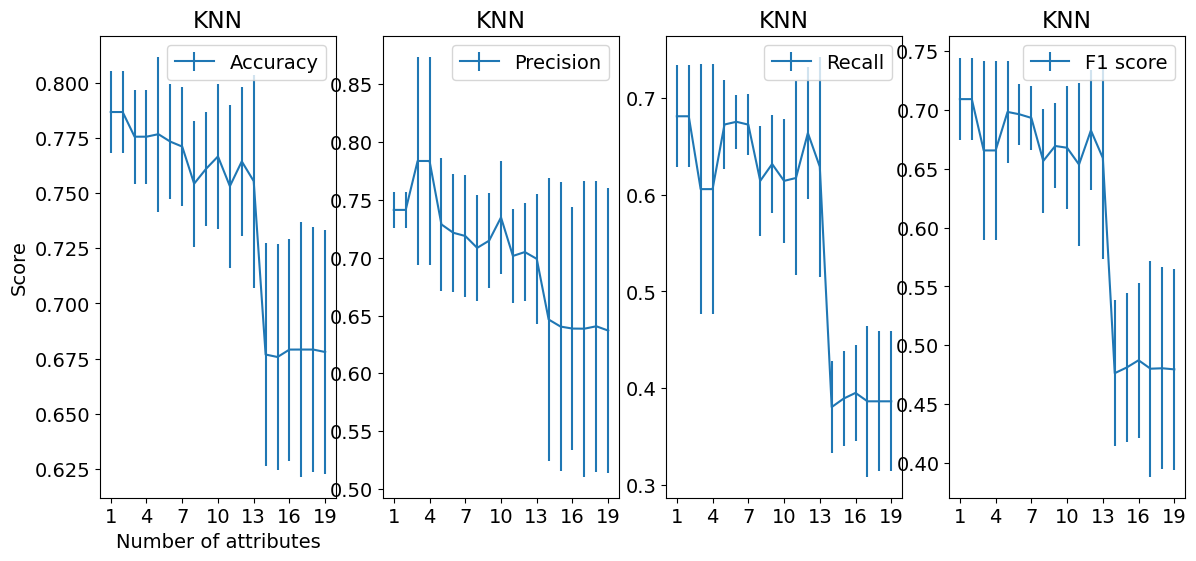

In [123]:
plt.rcParams.update({'font.size':14})
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(14,6))

axes[0].errorbar(n_attributes_in_range,scores_means_attr["KNN"]["accuracy_mean"],scores_std_attr["KNN"]["accuracy_std"],label="Accuracy")
axes[1].errorbar(n_attributes_in_range,scores_means_attr["KNN"]["precision_mean"],scores_std_attr["KNN"]["precision_std"],label="Precision")
axes[2].errorbar(n_attributes_in_range,scores_means_attr["KNN"]["recall_mean"],scores_std_attr["KNN"]["recall_std"],label="Recall")
axes[3].errorbar(n_attributes_in_range,scores_means_attr["KNN"]["f1_score_mean"],scores_std_attr["KNN"]["f1_score_std"],label="F1 score")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[0].set_xlabel("Number of attributes")
axes[0].set_ylabel("Score")
axes[0].set_title("KNN")
axes[1].set_title("KNN")
axes[2].set_title("KNN")
axes[3].set_title("KNN")
axes[0].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[1].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[2].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[3].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
plt.show()

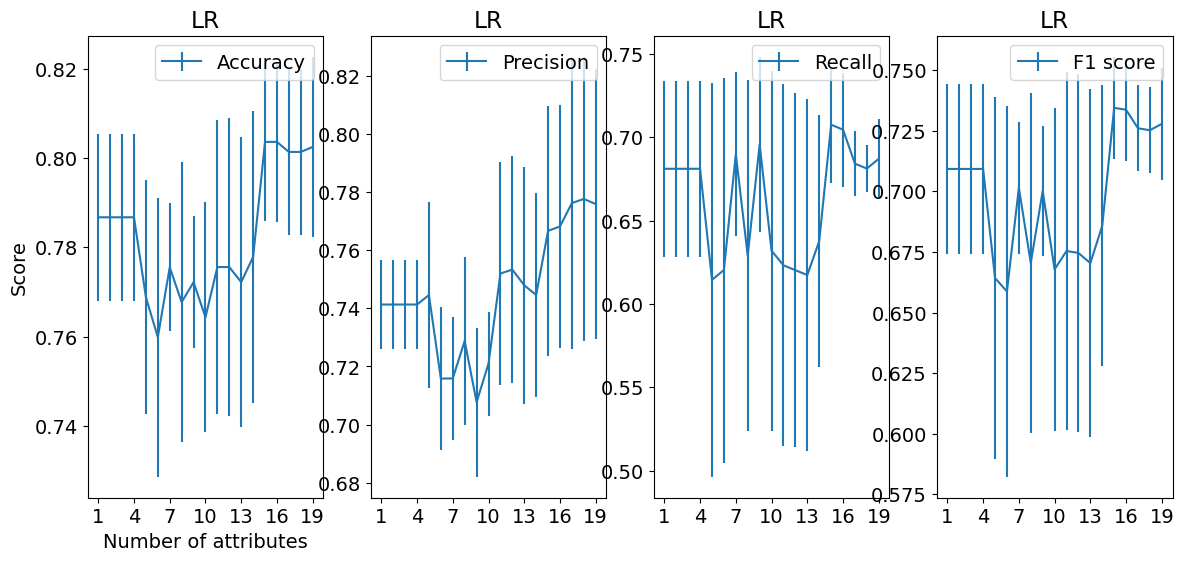

In [124]:
plt.rcParams.update({'font.size':14})
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(14,6))

axes[0].errorbar(n_attributes_in_range,scores_means_attr["LR"]["accuracy_mean"],scores_std_attr["LR"]["accuracy_std"],label="Accuracy")
axes[1].errorbar(n_attributes_in_range,scores_means_attr["LR"]["precision_mean"],scores_std_attr["LR"]["precision_std"],label="Precision")
axes[2].errorbar(n_attributes_in_range,scores_means_attr["LR"]["recall_mean"],scores_std_attr["LR"]["recall_std"],label="Recall")
axes[3].errorbar(n_attributes_in_range,scores_means_attr["LR"]["f1_score_mean"],scores_std_attr["LR"]["f1_score_std"],label="F1 score")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[0].set_xlabel("Number of attributes")
axes[0].set_ylabel("Score")
axes[0].set_title("LR")
axes[1].set_title("LR")
axes[2].set_title("LR")
axes[3].set_title("LR")
axes[0].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[1].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[2].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[3].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
plt.show()

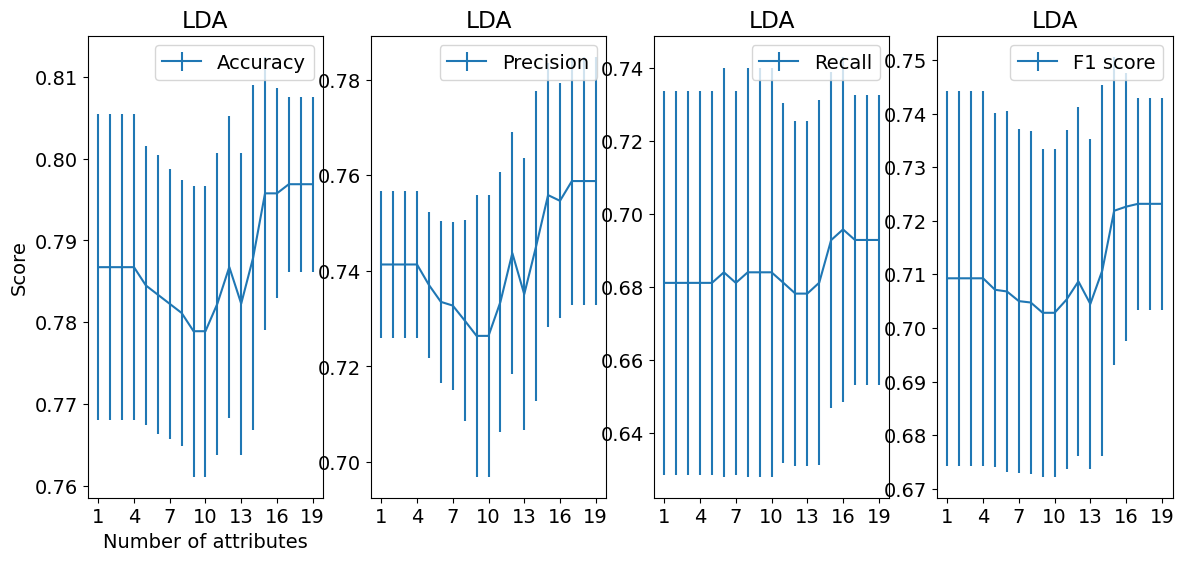

In [125]:
plt.rcParams.update({'font.size':14})
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(14,6))

axes[0].errorbar(n_attributes_in_range,scores_means_attr["LDA"]["accuracy_mean"],scores_std_attr["LDA"]["accuracy_std"],label="Accuracy")
axes[1].errorbar(n_attributes_in_range,scores_means_attr["LDA"]["precision_mean"],scores_std_attr["LDA"]["precision_std"],label="Precision")
axes[2].errorbar(n_attributes_in_range,scores_means_attr["LDA"]["recall_mean"],scores_std_attr["LDA"]["recall_std"],label="Recall")
axes[3].errorbar(n_attributes_in_range,scores_means_attr["LDA"]["f1_score_mean"],scores_std_attr["LDA"]["f1_score_std"],label="F1 score")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[0].set_xlabel("Number of attributes")
axes[0].set_ylabel("Score")
axes[0].set_title("LDA")
axes[1].set_title("LDA")
axes[2].set_title("LDA")
axes[3].set_title("LDA")
axes[0].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[1].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[2].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
axes[3].set_xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 3.0))
plt.show()

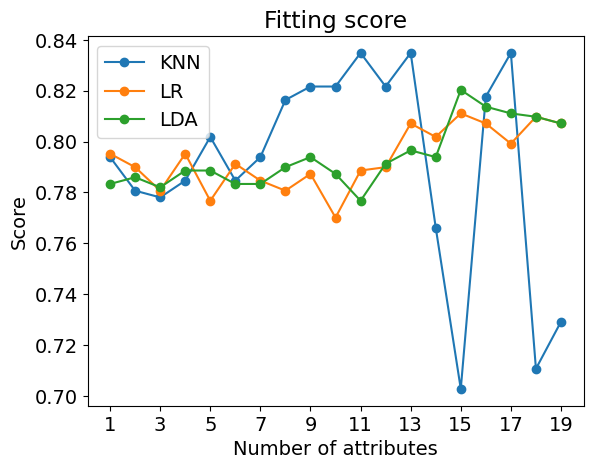

In [ ]:
plt.errorbar(n_attributes_in_range,train_scores["KNN"],marker='o',label="KNN")
plt.errorbar(n_attributes_in_range,train_scores["LR"],marker='o',label="LR")
plt.errorbar(n_attributes_in_range,train_scores["LDA"],marker='o',label="LDA")
plt.xticks(np.arange(min(n_attributes_in_range), max(n_attributes_in_range)+1, 2.0))
plt.title("Fitting score")
plt.xlabel("Number of attributes")
plt.ylabel("Score")
plt.legend()
plt.show()

### Best attributes by order

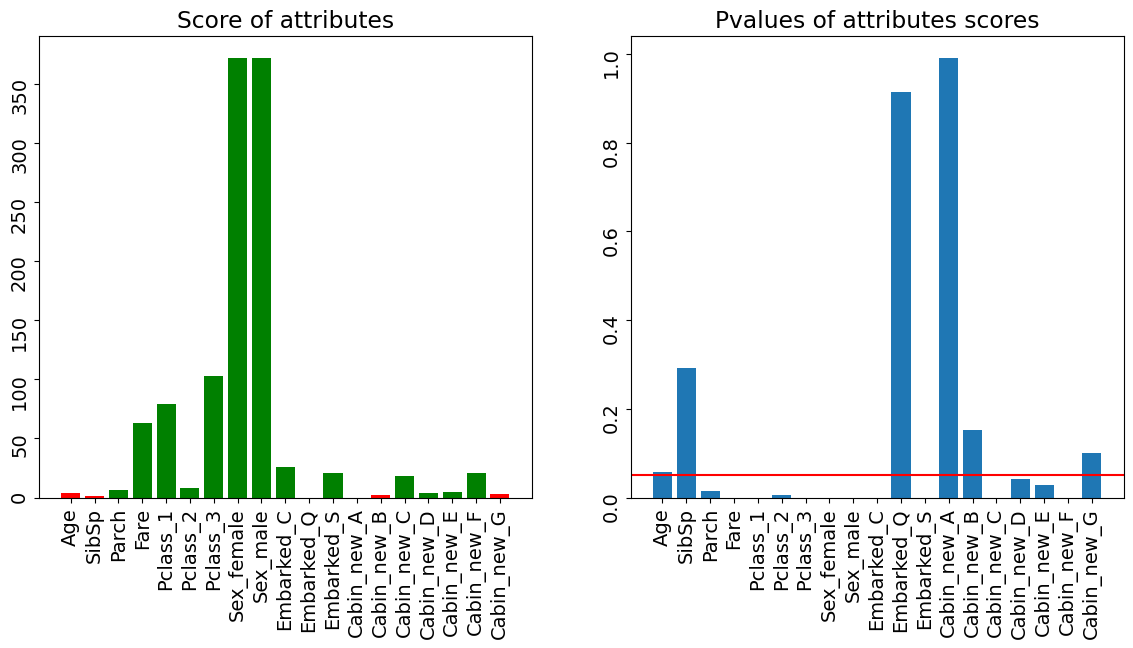

In [ ]:
#Intialisation de la méthode de selection

selector=SelectKBest(score_func=f_classif, k=len(X.columns))

# Entrainnement de la méthode
selector_fitted=selector.fit(X,y)

# Récuperation des variables sélectionnées
columns=X.columns[selector.get_support()]

col_colored={}
for col,pvalue in zip(columns,selector.pvalues_):
    
    if pvalue<0.05:

        col_colored[col]='green'
    else:
        
        col_colored[col]='red'




fig,axes=plt.suberrorbars(nrows=1,ncols=2,figsize=(14,6))

axes[0].bar(columns,selector.scores_,color=col_colored.values())
axes[0].tick_params(rotation=90)
axes[0].set_title("Score of attributes")

axes[1].bar(columns,selector.pvalues_)
axes[1].axhline(y = 0.05, color = 'r', linestyle = '-')
axes[1].tick_params(rotation=90)
#axes[1].set_ylim(ymax=0.4)
axes[1].set_title("Pvalues of attributes scores")
plt.show()